# Multiple linear regression

Give an input matrix $X \in R^{n \times d}$    and the output matrix  $Y \in R^{n \times c}$,  the ordinary least square measuring their relationship is defined as

$\min_W \|Y - XW\|_F^2$ 

where $W \in R^{d \times c}$ is the transfermation matrix.

Based on the criterion of convex optimization, we obtain their solution as 

$W = (X^t X)^{-1}X^tY$


where $X^t$ is the transpose of X.

Base on the criterion of gradient descent, the optimization of W can be obtained by first initializing W^{(1)} and then iteratively conduct the following step:

$W^{(i+1)} = W^{(i)} - \alpha (({W^{(i)}}^tX^tXW^{(i)})^{-1}X^tY)$




To train a multiple linear regression model, we have

Hypothesis: $h_\beta(x) = \beta^Tx$

Loss function: $J (\beta) = \frac{1}{2m} \sum_{i = 1}^m (\beta^Tx^{(i)} - y^{(i)})^2$

Gradient: $(h_\beta(x) - y)x_j$

Gradient descent updation:  $\beta_j := \beta_j - \alpha \frac{\partial J(\beta)}{\partial \beta_j}$

In [1]:
## matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
from mpl_toolkits.mplot3d import Axes3D

In [2]:
data = pd.read_csv('student.csv')
data.head()

,Math,Reading,Writing
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62


In [56]:
data.shape

(1000, 3)

In [3]:
math = data['Math'].values
read = data['Reading'].values
write = data['Writing'].values

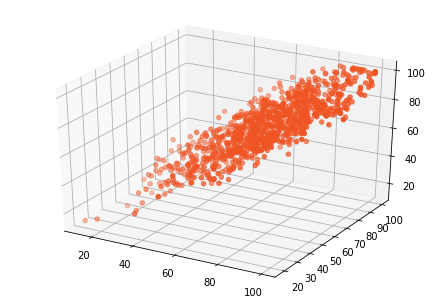

In [4]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(math, read, write, color='#ef5423')
plt.show()

In [13]:
# 1. Representation

# Obtain the dataset 

m = len(math)
x0 = np.ones(m)
X = np.array([x0, math, read]).T
B = np.array([0, 0, 0])
Y = np.array(write)
alpha = 0.0001

# Cost function

$J (\beta) = \frac{1}{2m} \sum_{i = 1}^m (\beta^Tx^{(i)} - y^{(i)})^2$


In [14]:
# 2 model

def cost_function(X, Y, B):
    m = len(Y)
    ##        ###################   ##
    ##        fill in code here     ##
    ##        ###################   ##
    
    return J

## gradient

$\beta_j := \beta_j - \alpha \frac{\partial J(\beta)}{\partial \beta_j}$

or 

$\beta_j := \beta_j - \alpha \frac{1}{m} \sum_{i = 1}^m (\beta^Tx^{(i)} - y^{(i)})^2x_j^{(i)}$

In [15]:
# 2 model

def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    
    for iteration in range(iterations):
        h = X.dot(B)
        loss = h - Y
        ##        ###################   ##
        ##        fill in code here     ##
        ##        ###################   ##
        
        
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost
        
    return B, cost_history

In [9]:
newB, cost_history = gradient_descent(X, Y, B, alpha, 100000)

Text(0.5, 1.0, 'Error vs. Training Epoch')

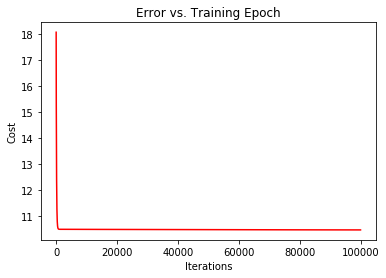

In [16]:
# Visualization 

#plot the cost
fig, ax = plt.subplots()  
ax.plot(np.arange(100000), cost_history, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  

In [11]:
cost_history[-1]

10.475123473539167

In [12]:
newB

array([-0.47889172,  0.09137252,  0.90144884])

# Evaluation metrics

In [17]:
# 4. Evaluation


def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse

def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

In [18]:
## Test

Y_pred = X.dot(newB)

In [69]:
rmse(Y, Y_pred)

4.577143972727789

In [71]:
r2_score(Y, Y_pred)

0.9097223273061553

# Exercise 1
Conduct multiple linear regression using convex optimization method at the same dataset.

# Exercise 2
Conduct multiple linear regression with normalization using convex optimization method at the same dataset.

# Exercise 3
The scikit-learn Approach